In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cars_img = cv2.imread("Data/car_plate.jpg")

In [15]:
def display_img(img):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)
    plt.show()
    plt.close()

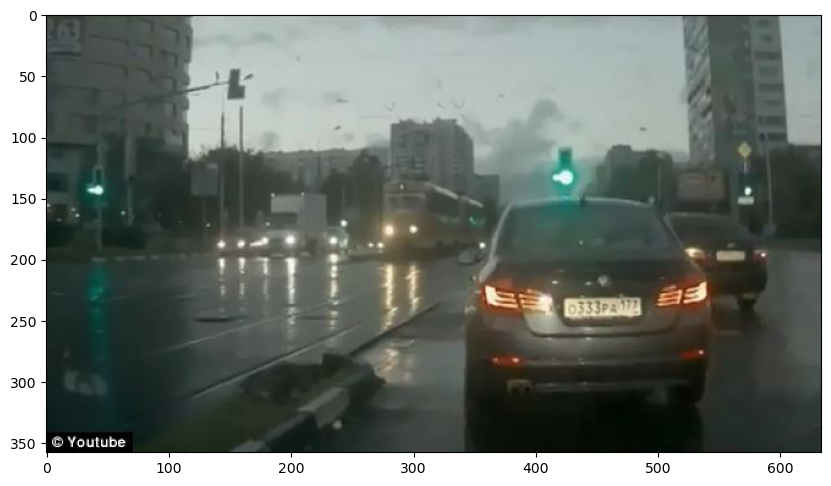

In [16]:
display_img(cars_img)

In [17]:
plate_cascade = cv2.CascadeClassifier("Data/haarcascades/haarcascade_russian_plate_number.xml")

In [18]:
plate_cascade

< cv2.CascadeClassifier 0x1317109b0>

In [23]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=3)
    print(plate_rects)
    for (x, y, w, h) in plate_rects:
        cv2.rectangle(plate_img, (x,y), (x+w, y+h), (0, 0, 255), 4)
    return plate_img

[[419 226  74  25]]


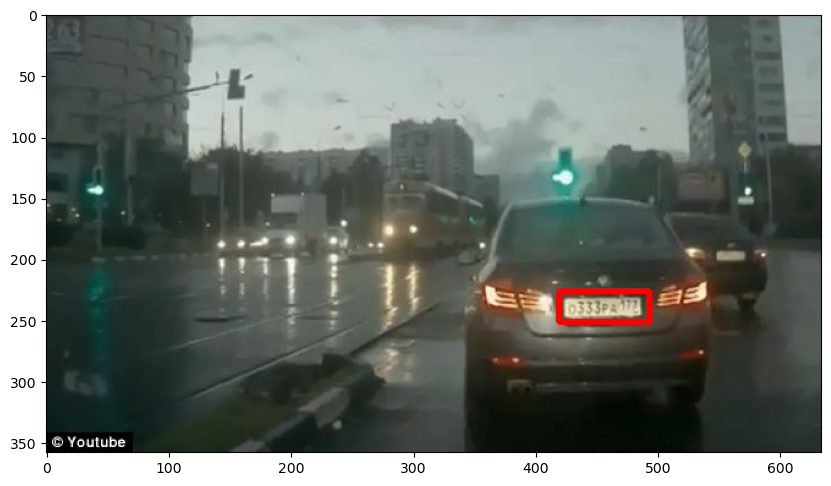

In [24]:
result_img = detect_plate(cars_img)


display_img(result_img)

In [25]:
def detect_and_blur_place(img):
    plate_img = img.copy()
    roi = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=3)
    for (x, y, w, h) in plate_rects:
        roi = roi[y:y+h, x:x+w]
        #region of intererst - plate 
        blurred_roi = cv2.medianBlur(roi, 7)

        plate_img[y:y+h, x:x+w] = blurred_roi

    return plate_img 

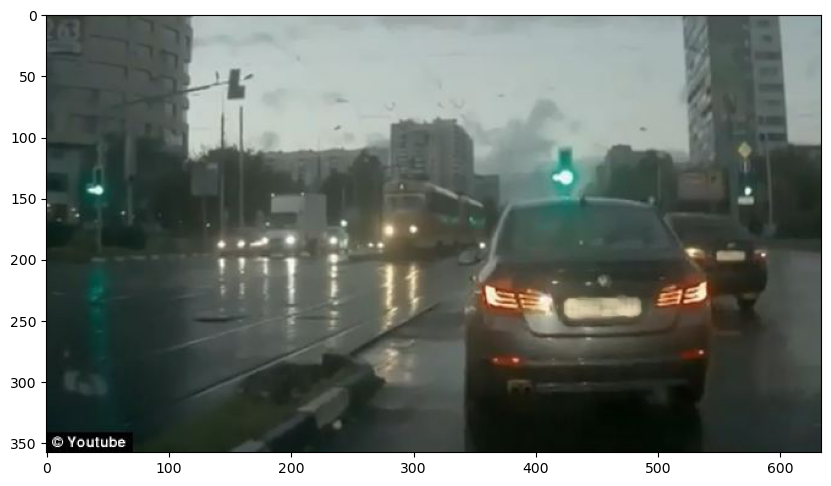

In [26]:
result_img = detect_and_blur_place(cars_img)

display_img(result_img)